In [1]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def execute_kruskal_wallis(data: pd.DataFrame, group_col: str, value_col: str):
    """
    Perform Kruskal-Wallis H-test for independent samples.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the data.
    group_col (str): The name of the column containing group labels.
    value_col (str): The name of the column containing values to be tested.

    Returns:
    dict: A dictionary containing the test statistic and p-value.
    """
    # Group data by the specified group column
    grouped_data = [group[value_col].values for name, group in data.groupby(group_col)]
    
    # Perform Kruskal-Wallis H-test
    stat, p_value = kruskal(*grouped_data)
    
    return {'statistic': stat, 'p_value': p_value}

In [3]:
def evaluate_results(results: dict, alpha: float = 0.05):
    """
    Evaluate the results of the Kruskal-Wallis test.

    Parameters:
    results (dict): The results dictionary containing 'statistic' and 'p_value'.
    alpha (float): Significance level for the test.

    Returns:
    str: A message indicating whether to reject or fail to reject the null hypothesis.
    """
    if results['p_value'] < alpha:
        return "Reject the null hypothesis: There is a significant difference between groups."
    else:
        return "Fail to reject the null hypothesis: No significant difference between groups."

In [4]:
def plot_results(data: pd.DataFrame, group_col: str, value_col: str):
    """
    Plot the distribution of values across different groups.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the data.
    group_col (str): The name of the column containing group labels.
    value_col (str): The name of the column containing values to be plotted.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=group_col, y=value_col, data=data)
    plt.title('Kruskal-Wallis Test Results')
    plt.xlabel(group_col)
    plt.ylabel(value_col)
    plt.show()

Reject the null hypothesis: There is a significant difference between groups.


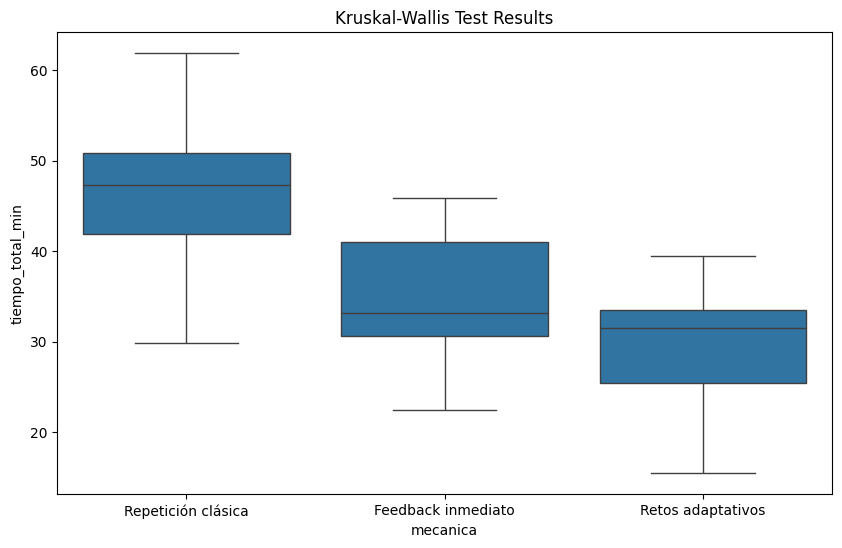

In [5]:
df = pd.read_csv("../data/mecanicas_sinteticas.csv")
result_test = execute_kruskal_wallis(data=df, group_col='mecanica', value_col='tiempo_total_min')
evaluation = evaluate_results(result_test, alpha=0.05)
print(evaluation)
plot_results(data=df, group_col='mecanica', value_col='tiempo_total_min')